In [1]:
import numpy as np
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [5]:
assert(X_train.shape[0] == y_train.shape[0])
assert(X_test.shape[0] == y_test.shape[0])
assert(X_train.shape[1:] == (28,28))
assert(X_test.shape[1:] == (28,28))

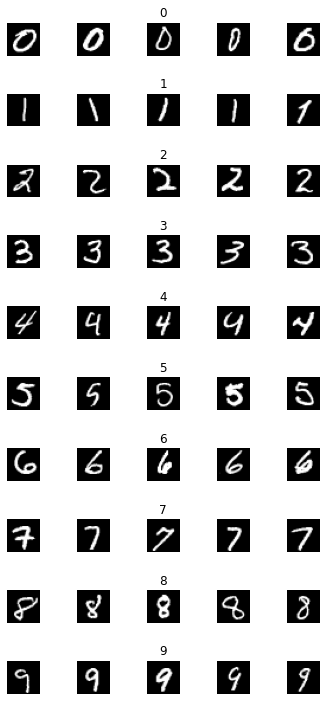

In [6]:
num_of_samples = []

cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

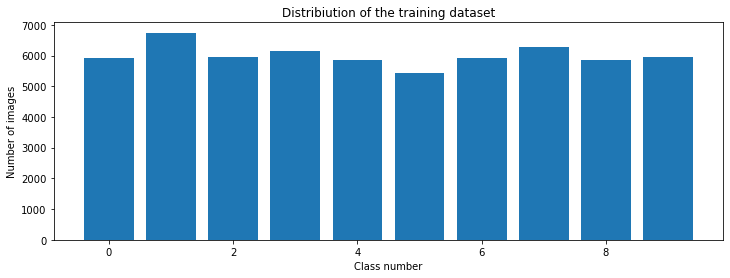

In [7]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribiution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [11]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate= 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle=1)

Epoch 1/10
270/270 [==============================] - 2s 4ms/step - loss: 0.5224 - accuracy: 0.8366 - val_loss: 0.2575 - val_accuracy: 0.9268
Epoch 2/10
270/270 [==============================] - 1s 4ms/step - loss: 0.3154 - accuracy: 0.9074 - val_loss: 0.2318 - val_accuracy: 0.9348
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2833 - accuracy: 0.9176 - val_loss: 0.2161 - val_accuracy: 0.9390
Epoch 4/10
270/270 [==============================] - 1s 5ms/step - loss: 0.2636 - accuracy: 0.9220 - val_loss: 0.2369 - val_accuracy: 0.9275
Epoch 5/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2526 - accuracy: 0.9259 - val_loss: 0.2207 - val_accuracy: 0.9355
Epoch 6/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2454 - accuracy: 0.9269 - val_loss: 0.2045 - val_accuracy: 0.9393
Epoch 7/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2435 - accuracy: 0.9285 - val_loss: 0.2179 - val_accuracy: 0.9388
Epoch 

Text(0.5, 0, 'epoch')

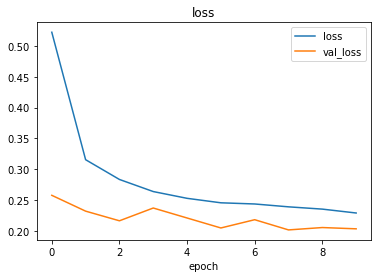

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

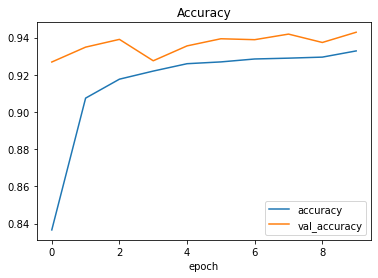

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [16]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.25252869725227356
Test accuracy: 0.9284999966621399


In [17]:
#import requests
#from PIL import Image
#url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
#response = requests.get(url, stream=True)
#img = Image.open(response.raw)
#plt.imshow(img)

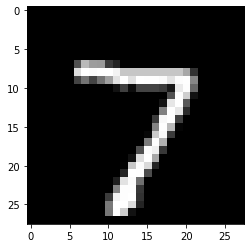

In [22]:
import cv2
img = cv2.imread('C:\\Users\\kamil\\Desktop\\Projects\\5. Handwritten digit recogition\\7.png')
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
#image= cv2.bitwise_not(gray)
image = gray
plt.imshow(gray, cmap=plt.get_cmap("gray"))

In [23]:
image = image/255
image = image.reshape(1, 784)

In [24]:
prediction=np.argmax(model.predict(image), axis=-1)
print(prediction)

1/1 [==============================] - 0s 101ms/step
[7]
